In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Title

## Subtitle
Some paragraph

In [2]:
metadata = pd.read_csv('../air_cleaner_data/personal-air-cleaner-experiments - Sheet1.csv', parse_dates=['start_time', 'end_time'])

In [3]:
metadata

,start_time,Distance (in),Experiment,end_time,competing airflow,Fan,shroud,spacing (in),push filters,pull filters,filepath
0,2023-03-26 21:34:45.239273,4,"blower, 1 QT3 HEPA, NCAF",2023-03-10 09:46:33.000000,False,blower,False,2.0,1 QT3 HEPA,NaN,../air_cleaner_data/2023-03-10_09-24-21-SPS3x_...
1,2023-03-26 21:39:29.013405,4,"blower, 1 QT3 HEPA, NCAF",2023-03-26 21:39:36.282274,False,blower,False,2.0,1 QT3 HEPA,NaN,../air_cleaner_data/2023-03-10_09-24-21-SPS3x_...
2,2023-06-12 13:01:22.083800,2,"2 QT3, NF-F12 iPPC-3000 full speed",2023-06-12 13:02:28.077759,NaN,NF-F12 iPPC-3000 Industrial,False,NaN,2 QT3 HEPA,NaN,../air_cleaner_data/2023-06-12_08:46:02.198914...
3,2023-06-12 13:03:29.802904,4,"2 QT3, NF-F12 iPPC-3000 full speed",2023-06-12 13:04:10.674973,NaN,NF-F12 iPPC-3000 Industrial,False,NaN,2 QT3 HEPA,NaN,../air_cleaner_data/2023-06-12_08:46:02.198914...
4,2023-06-12 13:04:55.906925,6,"2 QT3, NF-F12 iPPC-3000 full speed",2023-06-12 13:05:33.750074,NaN,NF-F12 iPPC-3000 Industrial,False,NaN,2 QT3 HEPA,NaN,../air_cleaner_data/2023-06-12_08:46:02.198914...
...,...,...,...,...,...,...,...,...,...,...,...
146,2023-07-30 17:16:56.399028,16,"AirGo M, EPA12, 50% speed",2023-07-30 17:17:29.126929,NaN,QT3,False,NaN,EPA 12,NaN,/Users/eugaddan/Developer/breathesafe/python/a...
147,2023-07-30 17:18:03.146933,18,"AirGo M, EPA12, 50% speed",2023-07-30 17:18:32.447974,NaN,QT3,False,NaN,EPA 12,NaN,/Users/eugaddan/Developer/breathesafe/python/a...
148,2023-07-30 17:19:15.078489,20,"AirGo M, EPA12, 50% speed",2023-07-30 17:19:56.160321,NaN,QT3,False,NaN,EPA 12,NaN,/Users/eugaddan/Developer/breathesafe/python/a...
149,2023-07-30 17:20:33.635770,22,"AirGo M, EPA12, 50% speed",2023-07-30 17:21:07.723323,NaN,QT3,False,NaN,EPA 12,NaN,/Users/eugaddan/Developer/breathesafe/python/a...


In [4]:
csv_metadata = metadata[metadata['Experiment'].str.contains('AirGo|SmartAir')].copy()

In [5]:
for x in ['start_time', 'end_time']:
    csv_metadata.loc[:, x] = csv_metadata[x] - pd.to_timedelta('4 hours')

/var/folders/c3/b8f8shqn6sq34qlk8wt9rcqh0000gn/T/ipykernel_34262/434301341.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  csv_metadata.loc[:, x] = csv_metadata[x] - pd.to_timedelta('4 hours')


In [6]:
csv_metadata

,start_time,Distance (in),Experiment,end_time,competing airflow,Fan,shroud,spacing (in),push filters,pull filters,filepath
58,2023-07-25 09:15:33.454026,2,"AirGo M, full speed",2023-07-25 09:16:41.212301,NaN,1 Arctic P12 Max,False,NaN,2 QT3 HEPA,NaN,/Users/eugaddan/Developer/breathesafe/python/a...
59,2023-07-25 09:17:22.919932,2,"AirGo M, full speed",2023-07-25 09:18:04.701322,NaN,1 Arctic P12 Max,False,NaN,2 QT3 HEPA,NaN,/Users/eugaddan/Developer/breathesafe/python/a...
60,2023-07-25 09:19:04.422233,4,"AirGo M, full speed",2023-07-25 09:20:18.274848,NaN,1 Arctic P12 Max,False,NaN,2 QT3 HEPA,NaN,/Users/eugaddan/Developer/breathesafe/python/a...
61,2023-07-25 09:22:04.666347,6,"AirGo M, full speed",2023-07-25 09:23:29.006429,NaN,1 Arctic P12 Max,False,NaN,2 QT3 HEPA,NaN,/Users/eugaddan/Developer/breathesafe/python/a...
62,2023-07-25 09:24:21.392406,8,"AirGo M, full speed",2023-07-25 09:24:58.532613,NaN,1 Arctic P12 Max,False,NaN,2 QT3 HEPA,NaN,/Users/eugaddan/Developer/breathesafe/python/a...
...,...,...,...,...,...,...,...,...,...,...,...
146,2023-07-30 13:16:56.399028,16,"AirGo M, EPA12, 50% speed",2023-07-30 13:17:29.126929,NaN,QT3,False,NaN,EPA 12,NaN,/Users/eugaddan/Developer/breathesafe/python/a...
147,2023-07-30 13:18:03.146933,18,"AirGo M, EPA12, 50% speed",2023-07-30 13:18:32.447974,NaN,QT3,False,NaN,EPA 12,NaN,/Users/eugaddan/Developer/breathesafe/python/a...
148,2023-07-30 13:19:15.078489,20,"AirGo M, EPA12, 50% speed",2023-07-30 13:19:56.160321,NaN,QT3,False,NaN,EPA 12,NaN,/Users/eugaddan/Developer/breathesafe/python/a...
149,2023-07-30 13:20:33.635770,22,"AirGo M, EPA12, 50% speed",2023-07-30 13:21:07.723323,NaN,QT3,False,NaN,EPA 12,NaN,/Users/eugaddan/Developer/breathesafe/python/a...


In [7]:
def relative_risk_reduction(df):
    return (df.iloc[0:5].mean() - df.iloc[-5:].mean()) / df.iloc[0:5].mean()

In [8]:
def compute_relative_risk_reduction_per_row(row):
    #row = csv_metadata.iloc[0]
    df = pd.read_csv(row['filepath'], parse_dates=['datetime'], index_col='datetime')
    row_data = df[(df.index > row['start_time']) & (df.index < row['end_time'])]
    return relative_risk_reduction(row_data)

In [9]:
csv_metadata


,start_time,Distance (in),Experiment,end_time,competing airflow,Fan,shroud,spacing (in),push filters,pull filters,filepath
58,2023-07-25 09:15:33.454026,2,"AirGo M, full speed",2023-07-25 09:16:41.212301,NaN,1 Arctic P12 Max,False,NaN,2 QT3 HEPA,NaN,/Users/eugaddan/Developer/breathesafe/python/a...
59,2023-07-25 09:17:22.919932,2,"AirGo M, full speed",2023-07-25 09:18:04.701322,NaN,1 Arctic P12 Max,False,NaN,2 QT3 HEPA,NaN,/Users/eugaddan/Developer/breathesafe/python/a...
60,2023-07-25 09:19:04.422233,4,"AirGo M, full speed",2023-07-25 09:20:18.274848,NaN,1 Arctic P12 Max,False,NaN,2 QT3 HEPA,NaN,/Users/eugaddan/Developer/breathesafe/python/a...
61,2023-07-25 09:22:04.666347,6,"AirGo M, full speed",2023-07-25 09:23:29.006429,NaN,1 Arctic P12 Max,False,NaN,2 QT3 HEPA,NaN,/Users/eugaddan/Developer/breathesafe/python/a...
62,2023-07-25 09:24:21.392406,8,"AirGo M, full speed",2023-07-25 09:24:58.532613,NaN,1 Arctic P12 Max,False,NaN,2 QT3 HEPA,NaN,/Users/eugaddan/Developer/breathesafe/python/a...
...,...,...,...,...,...,...,...,...,...,...,...
146,2023-07-30 13:16:56.399028,16,"AirGo M, EPA12, 50% speed",2023-07-30 13:17:29.126929,NaN,QT3,False,NaN,EPA 12,NaN,/Users/eugaddan/Developer/breathesafe/python/a...
147,2023-07-30 13:18:03.146933,18,"AirGo M, EPA12, 50% speed",2023-07-30 13:18:32.447974,NaN,QT3,False,NaN,EPA 12,NaN,/Users/eugaddan/Developer/breathesafe/python/a...
148,2023-07-30 13:19:15.078489,20,"AirGo M, EPA12, 50% speed",2023-07-30 13:19:56.160321,NaN,QT3,False,NaN,EPA 12,NaN,/Users/eugaddan/Developer/breathesafe/python/a...
149,2023-07-30 13:20:33.635770,22,"AirGo M, EPA12, 50% speed",2023-07-30 13:21:07.723323,NaN,QT3,False,NaN,EPA 12,NaN,/Users/eugaddan/Developer/breathesafe/python/a...


In [10]:
csv_metadata.iloc[-1]

start_time                                  2023-07-30 13:22:04.782697
Distance (in)                                                       24
Experiment                                   AirGo M, EPA12, 50% speed
end_time                                    2023-07-30 13:22:51.805173
competing airflow                                                  NaN
Fan                                                                QT3
shroud                                                           False
spacing (in)                                                       NaN
push filters                                                    EPA 12
pull filters                                                       NaN
filepath             /Users/eugaddan/Developer/breathesafe/python/a...
Name: 150, dtype: object

In [11]:
csv_metadata['relative_reduction_pm1_0_mass_conc'] = csv_metadata.apply(compute_relative_risk_reduction_per_row, axis=1)

In [12]:
csv_metadata

,start_time,Distance (in),Experiment,end_time,competing airflow,Fan,shroud,spacing (in),push filters,pull filters,filepath,relative_reduction_pm1_0_mass_conc
58,2023-07-25 09:15:33.454026,2,"AirGo M, full speed",2023-07-25 09:16:41.212301,NaN,1 Arctic P12 Max,False,NaN,2 QT3 HEPA,NaN,/Users/eugaddan/Developer/breathesafe/python/a...,0.678017
59,2023-07-25 09:17:22.919932,2,"AirGo M, full speed",2023-07-25 09:18:04.701322,NaN,1 Arctic P12 Max,False,NaN,2 QT3 HEPA,NaN,/Users/eugaddan/Developer/breathesafe/python/a...,0.837434
60,2023-07-25 09:19:04.422233,4,"AirGo M, full speed",2023-07-25 09:20:18.274848,NaN,1 Arctic P12 Max,False,NaN,2 QT3 HEPA,NaN,/Users/eugaddan/Developer/breathesafe/python/a...,0.749041
61,2023-07-25 09:22:04.666347,6,"AirGo M, full speed",2023-07-25 09:23:29.006429,NaN,1 Arctic P12 Max,False,NaN,2 QT3 HEPA,NaN,/Users/eugaddan/Developer/breathesafe/python/a...,0.736514
62,2023-07-25 09:24:21.392406,8,"AirGo M, full speed",2023-07-25 09:24:58.532613,NaN,1 Arctic P12 Max,False,NaN,2 QT3 HEPA,NaN,/Users/eugaddan/Developer/breathesafe/python/a...,0.659708
...,...,...,...,...,...,...,...,...,...,...,...,...
146,2023-07-30 13:16:56.399028,16,"AirGo M, EPA12, 50% speed",2023-07-30 13:17:29.126929,NaN,QT3,False,NaN,EPA 12,NaN,/Users/eugaddan/Developer/breathesafe/python/a...,0.584769
147,2023-07-30 13:18:03.146933,18,"AirGo M, EPA12, 50% speed",2023-07-30 13:18:32.447974,NaN,QT3,False,NaN,EPA 12,NaN,/Users/eugaddan/Developer/breathesafe/python/a...,0.305975
148,2023-07-30 13:19:15.078489,20,"AirGo M, EPA12, 50% speed",2023-07-30 13:19:56.160321,NaN,QT3,False,NaN,EPA 12,NaN,/Users/eugaddan/Developer/breathesafe/python/a...,0.376028
149,2023-07-30 13:20:33.635770,22,"AirGo M, EPA12, 50% speed",2023-07-30 13:21:07.723323,NaN,QT3,False,NaN,EPA 12,NaN,/Users/eugaddan/Developer/breathesafe/python/a...,0.512383


In [13]:
clean = csv_metadata.dropna(subset=['relative_reduction_pm1_0_mass_conc']) 

In [14]:
cleaned = clean[clean['relative_reduction_pm1_0_mass_conc'] > 0]

In [15]:
cleaned_no_dups = cleaned.drop_duplicates(subset=['Experiment', 'Distance (in)'], keep='last')

In [16]:
pivot = cleaned_no_dups[cleaned_no_dups['relative_reduction_pm1_0_mass_conc'] > 0].pivot(index='Experiment', columns='Distance (in)', values='relative_reduction_pm1_0_mass_conc')

In [17]:
blah = pivot.iloc[0]

In [18]:
round(pivot * 100, 1)

Distance (in),2,4,6,8,10,12,14,16,18,20,22,24
Experiment,,,,,,,,,,,,
"AirGo M, EPA12 filter",99.0,94.0,83.8,75.3,70.1,67.3,68.3,63.6,60.6,52.9,51.8,50.0
"AirGo M, EPA12, 50% speed",100.0,100.0,99.3,93.7,82.5,76.5,58.8,58.5,30.6,37.6,51.2,36.4
"AirGo M, EPA12, 75% speed",98.4,94.8,80.5,69.4,68.5,64.5,64.9,49.5,39.3,52.6,38.6,46.6
"AirGo M, full speed",83.7,74.9,73.7,66.0,68.8,68.4,66.0,60.0,57.2,56.1,53.3,54.5
"AirGo M, full speed, round 2",80.7,73.9,76.5,70.4,70.3,65.9,60.1,56.7,53.5,55.7,53.0,51.0
SmartAir QT3,89.9,93.0,88.5,65.9,70.6,73.8,66.9,59.2,NaN,48.5,46.7,38.0
"SmartAir QT3, round 2",97.6,94.0,86.9,74.7,73.7,68.1,53.4,47.4,45.8,39.7,37.8,39.6


<Axes: xlabel='Distance (in)', ylabel='Experiment'>

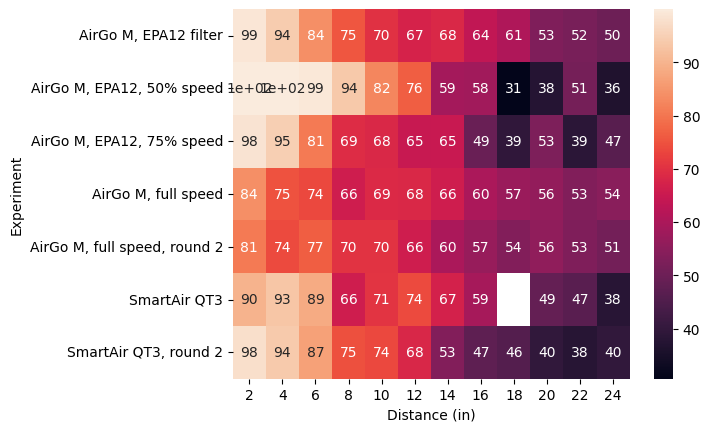

In [19]:
sns.heatmap(pivot * 100, annot=True)

In [29]:
plottable = (pivot[pivot.index.isin(['AirGo M, EPA12 filter', 'AirGo M, EPA12, 75% speed', 'AirGo M, EPA12, 50% speed', 'SmartAir QT3, round 2', 'AirGo M, full speed'])] * 100)\
.rename(
    {
        "SmartAir QT3, round 2": "SmartAir QT3, full speed", 
        'AirGo M, EPA12 filter': 'AirGo M, full speed', 
        'AirGo M, EPA12, 75% speed': 'AirGo M, 75% speed',
        'AirGo M, EPA12, 50% speed': 'AirGo M, 50% speed',
        'AirGo M, full speed': 'AirGo M, 2 QT3 filters, full speed'
    }
)

In [48]:
ordering = pd.DataFrame(
    [
        {'Distance (in)': 'AirGo M, 2 QT3 filters, full speed', 'order': -1},
        {'Distance (in)': 'SmartAir QT3, full speed', 'order': 0},
        {'Distance (in)': 'AirGo M, full speed', 'order': 1},
        {'Distance (in)': 'AirGo M, 75% speed', 'order': 2},
        {'Distance (in)': 'AirGo M, 50% speed', 'order': 3},
    ]
).set_index('Distance (in)')
        
         

In [62]:
sorted = plottable.merge(ordering, left_index = True, right_index = True).sort_values(by='order')
sorted.drop(columns=['order'], inplace=True)

In [63]:
list(sorted.index)

['AirGo M, 2 QT3 filters, full speed',
 'SmartAir QT3, full speed',
 'AirGo M, full speed',
 'AirGo M, 75% speed',
 'AirGo M, 50% speed']

Text(0.5, 1.0, 'Relative Reduction of PM 1.0 (Percentage)')

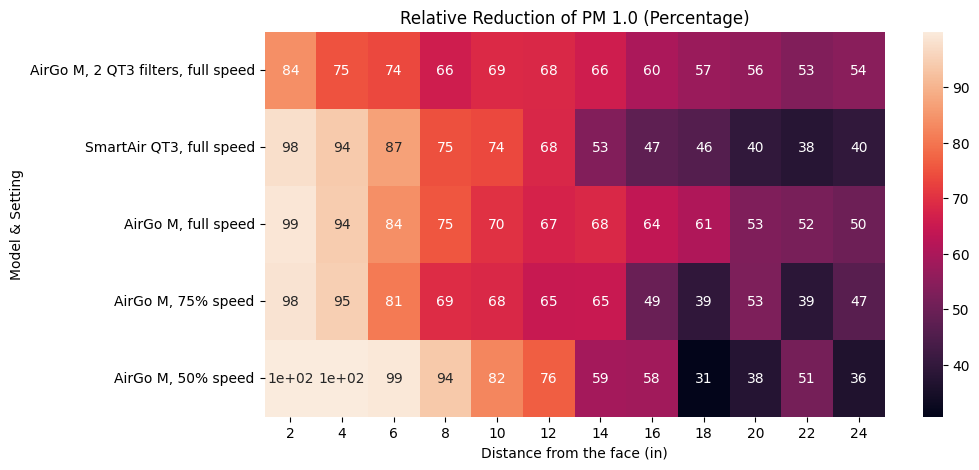

In [68]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.heatmap(sorted, annot=True, ax=ax)
ax.set_xlabel('Distance from the face (in)')
ax.set_ylabel('Model & Setting')
ax.set_title("Relative Reduction of PM 1.0 (Percentage)") 


In [32]:
plottable

Distance (in),2,4,6,8,10,12,14,16,18,20,22,24
Experiment,,,,,,,,,,,,
"AirGo M, full speed",99.001396,94.027877,83.826607,75.323706,70.138078,67.264299,68.288447,63.597565,60.629730,52.864564,51.822684,50.028768
"AirGo M, 50% speed",99.987490,99.972658,99.340883,93.741347,82.475449,76.482211,58.819629,58.476884,30.597517,37.602762,51.238317,36.366749
"AirGo M, 75% speed",98.396920,94.796271,80.541444,69.353065,68.460803,64.515133,64.926534,49.459690,39.343314,52.634910,38.565064,46.572578
"AirGo M, 2 QT3 filters, full speed",83.743404,74.904121,73.651403,65.970818,68.803156,68.409907,66.005947,59.986477,57.211497,56.132608,53.276944,54.464494
"SmartAir QT3, full speed",97.621352,93.968519,86.858490,74.735488,73.658740,68.055775,53.405656,47.411733,45.826323,39.747910,37.797432,39.570147


Text(0.5, 1.0, 'Relative Reduction of PM 1.0')

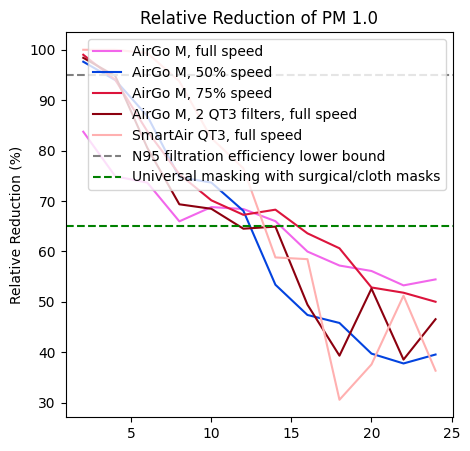

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
styles = ['r-', 'g-', 'b-', 'o-']

color_map = {
    'AirGo M, full speed': '#DC143C',
    'AirGo M, 75% speed':    '#8C000F',
    'AirGo M, 50% speed': '#ffb0b0',
    'AirGo M, 2 QT3 filters, full speed': '#f266eb',
    'SmartAir QT3, full speed': '#0343DF'
}

for i, row in sorted.iterrows():
    row.plot(ax=ax, color=color_map[i])#style=styles[i])
    #plottable.iloc[i].plot(ax=ax)
# pivot.iloc[0].plot(ax=ax)
# pivot.iloc[1].plot(ax=ax, style='r-')
# pivo
ax.set_ylabel("Relative Reduction (%)")
ax.axhline(95, color='gray', linestyle='dashed')
ax.axhline((1-(1-0.5)*(1-.3)) * 100, color='green', linestyle='dashed')
ax.legend(list(plottable.index) + ['N95 filtration efficiency lower bound', 'Universal masking with surgical/cloth masks'])
ax.set_title('Relative Reduction of PM 1.0')

In [ ]:
plottable.rename({"SmartAir QT3, round 2": "SmartAir QT3"})